This method uses the content based approach to include the user's genre preference and recommends movies  similar to user's highly rated movies.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [35]:
# Load movie data
movies = pd.read_csv("../../dataset/tmdb_movies.csv")#, converters={"genres": literal_eval, "tag": literal_eval})

In [36]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [37]:
movies.shape

(4803, 20)

In [38]:
movies['tagline'] = movies['tagline'].fillna('')
movies['description'] = movies['overview'] + movies['tagline']
movies['description'] = movies['description'].fillna('')

In [39]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['description'])

In [40]:
tfidf_matrix.shape

(4803, 149317)

In [41]:
# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
movies = movies.reset_index()
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])
indices.head(2)

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
dtype: int64

In [43]:
def get_recommendations(title):
    idx = indices[title]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [44]:
get_recommendations('The Dark Knight').head(45)

3                         The Dark Knight Rises
299                              Batman Forever
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
1359                                     Batman
2507                                  Slow Burn
1181                                        JFK
119                               Batman Begins
879                         Law Abiding Citizen
205          Sherlock Holmes: A Game of Shadows
9            Batman v Superman: Dawn of Justice
2193                       Secret in Their Eyes
210                              Batman & Robin
2020                                 The Rookie
58                                  Rush Hour 3
2207                                  12 Rounds
4135            Gangster's Paradise: Jerusalema
2692                                    Thinner
3725                                The Sweeney
506                             Despicable Me 2
2464                     The Master of D

In [45]:
get_recommendations('The Godfather').head(10)

2731     The Godfather: Part II
1873                 Blood Ties
3859            Lords of London
3623                       Made
3727                 Easy Money
3164              Loose Cannons
1475          Playing for Keeps
3960               The Deported
2038              Summer of Sam
867     The Godfather: Part III
Name: title, dtype: object

In [46]:
get_recommendations('Toy Story').head(10)

343                Toy Story 2
42                 Toy Story 3
1779    The 40 Year Old Virgin
891            Man on the Moon
3379              Factory Girl
3873             Class of 1984
2869    For Your Consideration
3065                Heartbeeps
3383                 Losin' It
2569               Match Point
Name: title, dtype: object

In [49]:
get_recommendations('The Godfather').head(10)

2731     The Godfather: Part II
1873                 Blood Ties
3859            Lords of London
3623                       Made
3727                 Easy Money
3164              Loose Cannons
1475          Playing for Keeps
3960               The Deported
2038              Summer of Sam
867     The Godfather: Part III
Name: title, dtype: object

In [47]:
# get_recommendations('Jumanji').head(10)

In [50]:
# get_recommendations('Doctor Who: Last Christmas').head(10)

In [51]:
movies[movies['title'] == 'The Godfather']['genres'].values[0]

'[{"id": 18, "name": "Drama"}, {"id": 80, "name": "Crime"}]'

In [52]:
movies[movies['title'] == 'The Godfather']['overview'].values[0]

'Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.'

In [53]:
get_recommendations('Inception').head(10)

2897                         Cypher
2389                    Renaissance
4253             Closer to the Moon
3599                      Lone Star
1930                     Stone Cold
1683                Pitch Perfect 2
1470                         Stolen
1663    Once Upon a Time in America
3962                      Open Road
831                    Tango & Cash
Name: title, dtype: object

In [55]:
movies[movies['title'] == 'Cypher']['overview'].values[0]

'An unsuspecting, disenchanted man finds himself working as a spy in the dangerous, high-stakes world of corporate espionage. Quickly getting way over-his-head, he teams up with a mysterious femme fatale.'

In [56]:
movies[movies['title'] == 'Inception']['overview'].values[0]

'Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.'

In [57]:
popularity_df = movies[['popularity', 'vote_average', 'vote_count']]
popularity_df.corr()

,popularity,vote_average,vote_count
popularity,1.000000,0.273952,0.778130
vote_average,0.273952,1.000000,0.312997
vote_count,0.778130,0.312997,1.000000


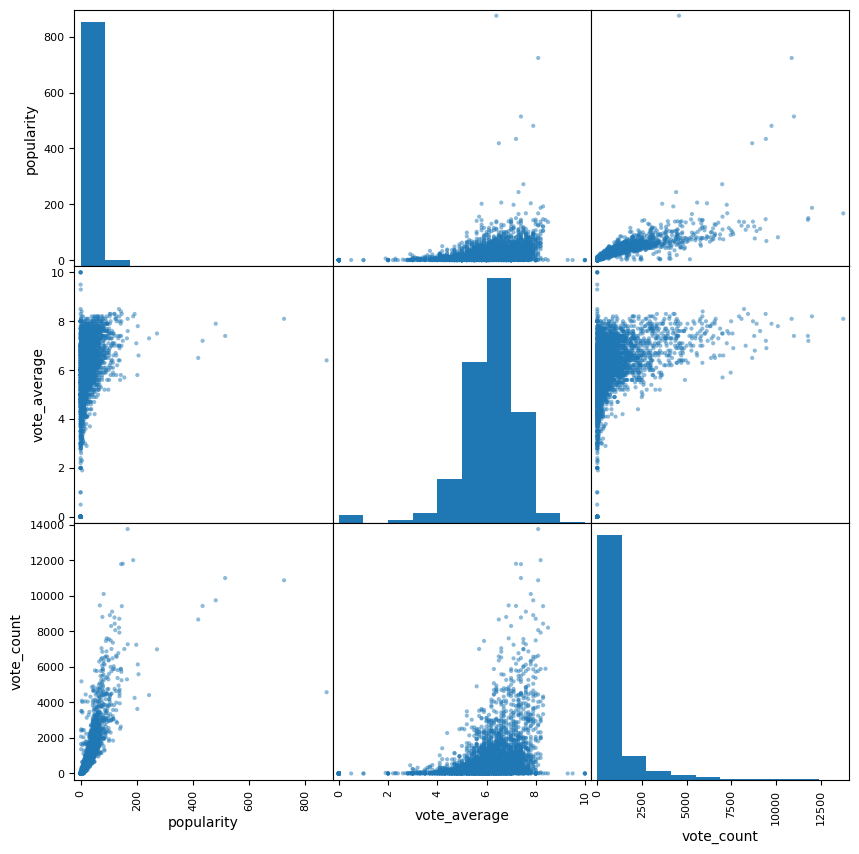

In [58]:
pd.plotting.scatter_matrix(popularity_df, figsize=(10, 10))
plt.show()

## Include genre in TF-IDF

In [59]:
movies['tagline'] = movies['tagline'].fillna('')
movies['description_genre'] = movies['overview'] + movies['tagline'] + 2*movies['genres']
movies['description_genre'] = movies['description_genre'].fillna('')

In [60]:
tf_new = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix_new = tf_new.fit_transform(movies['description_genre'])

In [61]:
cosine_sim_new = linear_kernel(tfidf_matrix_new, tfidf_matrix_new)

In [74]:
tf_new.vocabulary_

{'22nd': 1105,
 'century': 20635,
 'paraplegic': 98433,
 'marine': 84845,
 'dispatched': 37428,
 'moon': 89877,
 'pandora': 98277,
 'unique': 140820,
 'mission': 88809,
 'torn': 136175,
 'following': 51260,
 'orders': 96791,
 'protecting': 106063,
 'alien': 4715,
 'civilization': 23395,
 'enter': 43056,
 'world': 148989,
 'id': 66122,
 '28': 1149,
 'action': 2431,
 '12': 165,
 'adventure': 3171,
 '14': 221,
 'fantasy': 47444,
 '878': 1491,
 'science': 117277,
 'fiction': 49020,
 '22nd century': 1106,
 'century paraplegic': 20682,
 'paraplegic marine': 98434,
 'marine dispatched': 84852,
 'dispatched moon': 37432,
 'moon pandora': 89888,
 'pandora unique': 98280,
 'unique mission': 140835,
 'mission torn': 88946,
 'torn following': 136183,
 'following orders': 51291,
 'orders protecting': 96808,
 'protecting alien': 106064,
 'alien civilization': 4725,
 'civilization enter': 23401,
 'enter world': 43091,
 'world pandora': 149309,
 'pandora id': 98279,
 'id 28': 66134,
 '28 action': 1151

In [75]:
tf_new.vocabulary_['action']

2431

In [76]:
movies = movies.reset_index()
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])
indices.head(2)

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
dtype: int64

In [79]:
def get_recommendations_new(title):
    idx = indices[title]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [80]:
get_recommendations_new('The Godfather').head(10)

2731     The Godfather: Part II
1873                 Blood Ties
3727                 Easy Money
2038              Summer of Sam
867     The Godfather: Part III
3859            Lords of London
3409        Criminal Activities
2130               The American
4226                Nine Queens
1225           Mickey Blue Eyes
Name: title, dtype: object

In [81]:
movies[movies['title'] == 'The Godfather']['genres'].values

array(['[{"id": 18, "name": "Drama"}, {"id": 80, "name": "Crime"}]'],
      dtype=object)

In [82]:
movies[movies['title'] == "It's Such a Beautiful Day"]['genres'].values

array([], dtype=object)

In [83]:
movies[movies['title'] == 'Doctor Who: Last Christmas']['overview'].values

array([], dtype=object)

In [84]:
movies[movies['title'] == '4:44 Last Day on Earth']['overview'].values

array([], dtype=object)

In [ ]:
movies[movies['title'] == '20 Years After']['genres'].values

array(["['Drama', 'Fantasy', 'Sci-Fi']"], dtype=object)

In [ ]:
movies[movies['title'] == '20 Years After']['overview'].values

array(['In the middle of nowhere, 20 years after an apocalyptic terrorist event that obliterated the face of the world!'],
      dtype=object)

In [85]:
get_recommendations_new('Inception').head(10)

4401         The Helix... Loaded
922                      Knowing
920                        Congo
1320                  Switchback
2897                      Cypher
322            The Fifth Element
275              Minority Report
4715           Sound of My Voice
2264    Dylan Dog: Dead of Night
1271                    Pandorum
Name: title, dtype: object

In [86]:
movies[movies['title'] == 'Game Over']['description_genre'].values

array([], dtype=object)

In [87]:
movies[movies['title'] == 'Inception']['description_genre'].values

array(['Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.Your mind is the scene of the crime.[{"id": 28, "name": "Action"}, {"id": 53, "name": "Thriller"}, {"id": 878, "name": "Science Fiction"}, {"id": 9648, "name": "Mystery"}, {"id": 12, "name": "Adventure"}][{"id": 28, "name": "Action"}, {"id": 53, "name": "Thriller"}, {"id": 878, "name": "Science Fiction"}, {"id": 9648, "name": "Mystery"}, {"id": 12, "name": "Adventure"}]'],
      dtype=object)

In [88]:
get_recommendations_new('Avatar').head(10)

4401                 The Helix... Loaded
322                    The Fifth Element
1191                      Small Soldiers
232                        The Wolverine
931               Race to Witch Mountain
14                          Man of Steel
61                     Jupiter Ascending
1652                Dragonball Evolution
2069    Teenage Mutant Ninja Turtles III
46            X-Men: Days of Future Past
Name: title, dtype: object

### IMDB Weighted Average 

In [89]:
# this is V
vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')

# this is R
vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')

# this is C
C = vote_averages.mean()
C

5.6529252550489275

In [90]:
m = vote_counts.quantile(0.95)
m

3040.8999999999996

In [91]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

## Improved Recommendations

In [92]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies_x = movies.iloc[movie_indices][['title', 'vote_count', 'vote_average']]
    vote_counts = movies_x[movies_x['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies_x[movies_x['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies_x[(movies_x['vote_count'] >= m) & (movies_x['vote_count'].notnull()) &
                       (movies_x['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [95]:
improved_recommendations('The Godfather').head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_16204\3457986007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\USER\AppData\Local\Temp\ipykernel_16204\3457986007.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\USER\AppData\Local\Temp\ipykernel_16204\3457986007.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,title,vote_count,vote_average,wr
2731,The Godfather: Part II,3338,8,6.881121
867,The Godfather: Part III,1546,7,6.106952
879,Law Abiding Citizen,1486,7,6.095116
892,Casino,1307,7,6.057863
1394,Donnie Brasco,1147,7,6.021868
980,The Life of David Gale,480,7,5.836570
1486,The Punisher,766,6,5.722761
1178,Vantage Point,716,6,5.719072
2130,The American,481,5,5.563753
1664,Dead Man Down,638,5,5.539694


In [96]:
improved_recommendations('Avatar').head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_16204\3457986007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_count'] = qualified['vote_count'].astype('int')
C:\Users\USER\AppData\Local\Temp\ipykernel_16204\3457986007.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['vote_average'] = qualified['vote_average'].astype('int')
C:\Users\USER\AppData\Local\Temp\ipykernel_16204\3457986007.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,title,vote_count,vote_average,wr
46,X-Men: Days of Future Past,6032,7,6.548510
322,The Fifth Element,3885,7,6.408551
31,Iron Man 3,8806,6,5.910912
14,Man of Steel,6359,6,5.887720
232,The Wolverine,4053,6,5.851222
495,Journey 2: The Mysterious Island,1030,5,5.487725
505,The League of Extraordinary Gentlemen,1155,5,5.473195
10,Superman Returns,1400,5,5.447090
61,Jupiter Ascending,2768,5,5.341800
72,Suicide Squad,7458,5,5.189113
